<a href="https://colab.research.google.com/github/Bautistabudano01/ProyectoFundamentosDeCienciaDeDatos/blob/main/ProyectoDSParteI_Budano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Abstract

En las últimas décadas, la salud mental de los estudiantes universitarios ha adquirido una creciente relevancia, impulsada por factores como el estrés académico, el aislamiento social y la incertidumbre económica. En el contexto argentino, donde las tasas de deserción y abandono son elevadas, entender los factores que afectan el bienestar emocional puede ofrecer herramientas valiosas para mejorar la retención en el nivel superior.

Esta problemática no surge únicamente desde lo estadístico o institucional, sino también desde experiencias personales y cercanas. Muchos estudiantes atraviesan etapas de gran frustración académica que impactan directamente en su salud emocional, generando desmotivación, ansiedad o incluso depresión. En particular, quienes deben compaginar el estudio con un trabajo de tiempo parcial o completo, enfrentan un nivel de exigencia y cansancio que puede tornarse insostenible si los resultados académicos no acompañan.

En este proyecto se utilizará un dataset sobre salud mental de estudiantes universitarios, que incluye variables relacionadas con el sueño, el estrés, la vida social, el uso de redes sociales, entre otras. El análisis buscará identificar patrones y relaciones entre estas variables y los niveles de ansiedad y depresión reportados por los estudiantes, con el objetivo de detectar perfiles de riesgo.

Este tipo de abordajes puede servir como base para generar estrategias de acompañamiento más efectivas, tanto desde el ámbito educativo como desde políticas públicas. Al comprender mejor cómo interactúan estos factores, se podrán diseñar intervenciones más personalizadas y humanas que contribuyan a mejorar el bienestar y la permanencia en los estudios superiores.


### Preguntas e hipótesis de interés

**Preguntas principales del análisis:**

1. ¿Existe relación entre la duración del sueño y los niveles de depresión reportados por los estudiantes?
2. ¿Los estudiantes con mayores niveles de estrés tienden a presentar más ansiedad y depresión?
3. ¿El uso excesivo de redes sociales está asociado a un mayor malestar emocional?
4. ¿El año de cursada o el curso influyen en los niveles de salud mental?
5. ¿Las mujeres reportan niveles más altos de ansiedad o depresión en comparación con otros géneros?

**Hipótesis iniciales:**

- H1: Los estudiantes que duermen menos de 6 horas presentan mayores niveles de depresión.
- H2: A mayor nivel de estrés declarado, mayor es la probabilidad de reportar ansiedad o síntomas depresivos.
- H3: El uso intenso de redes sociales (más de 4 horas diarias) está asociado a peores indicadores de salud emocional.
- H4: Los estudiantes de años superiores (3º, 4º, 5º) presentan mayores niveles de agotamiento y depresión que los de primer año.
- H5: Los estudiantes que además trabajan presentan mayores niveles de estrés, depresión o insatisfacción con sus estudios, en comparación con los que solo estudian.

Estas preguntas y supuestos guiarán el análisis exploratorio y las visualizaciones que se desarrollarán en el resto del proyecto.


In [ ]:
import pandas as pd

In [ ]:
archivo = "/content/drive/MyDrive/dataset science/student_depression_dataset.csv"
df = pd.read_csv(archivo, index_col= "id")
df.head(5)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
# Exploracion inicial del dataset

#Dimensions

dimensiones = df.shape

# Informacion general del dataset

info = df.info()

#Estadisticas descriptivas de las columnas

resumen_numerico = df.describe()

#Verificacion de valores faltantes
valores_nulos = df.isnull().sum

dimensiones, info, resumen_numerico, valores_nulos

<class 'pandas.core.frame.DataFrame'>
Index: 27901 entries, 2 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  Degree

((27901, 17),
 None,
                 Age  Academic Pressure  Work Pressure          CGPA  \
 count  27901.000000       27901.000000   27901.000000  27901.000000   
 mean      25.822300           3.141214       0.000430      7.656104   
 std        4.905687           1.381465       0.043992      1.470707   
 min       18.000000           0.000000       0.000000      0.000000   
 25%       21.000000           2.000000       0.000000      6.290000   
 50%       25.000000           3.000000       0.000000      7.770000   
 75%       30.000000           4.000000       0.000000      8.920000   
 max       59.000000           5.000000       5.000000     10.000000   
 
        Study Satisfaction  Job Satisfaction  Work/Study Hours    Depression  
 count        27901.000000      27901.000000      27901.000000  27901.000000  
 mean             2.943837          0.000681          7.156984      0.585499  
 std              1.361148          0.044394          3.707642      0.492645  
 min         

### Exploración inicial del dataset

Se trabaja con un conjunto de datos compuesto por 27.901 registros y 18 columnas, que contiene información sobre salud mental, presión académica y laboral, rendimiento académico y estilo de vida de estudiantes universitarios.

El dataset no presenta valores faltantes en ninguna de sus columnas, lo cual permite trabajar con los datos directamente sin aplicar técnicas de imputación.

Las variables numéricas más relevantes como `Edad`, `Horas de estudio/trabajo`, `Horas de sueño`, `Presión académica` y `Promedio académico (CGPA)` muestran una distribución amplia y parecen estar correctamente formateadas.

A continuación, se exploran las estadísticas generales del conjunto y se evalúan los tipos de datos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df["Sleep Duration"].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [ ]:
# Limpiaremos las comillas simples de los valores

df["Sleep Duration"] = df["Sleep Duration"].str.replace("'", "")

# Definiremos un orden logico
orden_sueño = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']

#Convertir a categoria ordenada
df["Sleep Duration"] = pd.Categorical(df["Sleep Duration"], categories=orden_sueño, ordered=True)

#Revisaremos como quedo
df['Sleep Duration'].value_counts().sort_index()

,count
Sleep Duration,
Less than 5 hours,8310
5-6 hours,6183
7-8 hours,7346
More than 8 hours,6044
Others,18


<ipython-input-14-355a6cb35f2c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_dep = df.groupby('Sleep Duration')['Depression'].mean().sort_index()


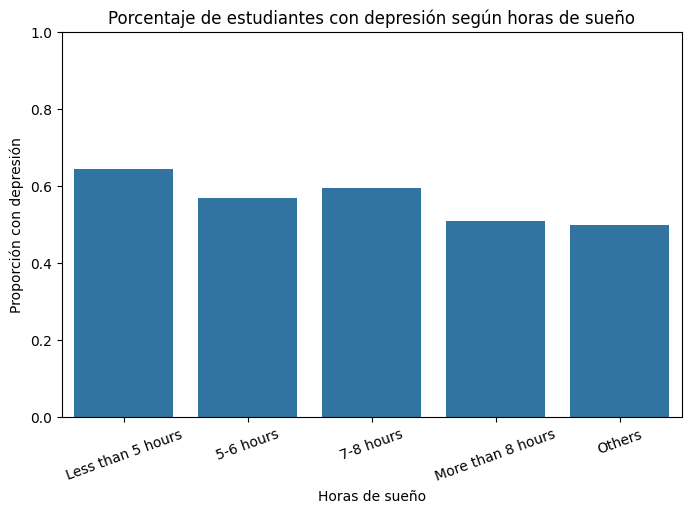

In [ ]:
#Agrupar y calcular proporcion de estudiantes con depresion por grupo de sueno
sleep_dep = df.groupby('Sleep Duration')['Depression'].mean().sort_index()

# crearemos un boxplot
plt.figure(figsize=(8,5))
sns.barplot(x=sleep_dep.index, y=sleep_dep.values)

#Titulo y etiquetas
plt.title('Porcentaje de estudiantes con depresión según horas de sueño')
plt.ylabel('Proporción con depresión')
plt.xlabel('Horas de sueño')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()

### Interpretación del gráfico

El gráfico muestra la proporción de estudiantes que presentan síntomas de depresión según la cantidad de horas que duermen. Se observa una tendencia clara: **a menor cantidad de sueño, mayor es el porcentaje de estudiantes con depresión**.

- Aquellos que duermen **menos de 5 horas** tienen un índice de depresión superior al 60%.
- El grupo que duerme **más de 8 horas** presenta la proporción más baja (alrededor del 50%).
- Incluso en los grupos de 5-6 y 7-8 horas, la prevalencia de depresión sigue siendo significativa.

Este resultado respalda la hipótesis planteada: **los estudiantes con menos horas de sueño tienden a reportar mayores niveles de depresión**, lo cual puede estar relacionado con una sobrecarga académica, estrés, o desregulación del ritmo de vida.

Este patrón sugiere que **la calidad y cantidad de sueño puede ser un factor clave a considerar en intervenciones de salud mental para estudiantes**.



In [ ]:
#¿Existe una diferencia en la frecuencia de pensamientos suicidas según el género?

df['Gender'].unique(), df['Have you ever had suicidal thoughts ?'].unique()

(array(['Male', 'Female'], dtype=object), array(['Yes', 'No'], dtype=object))

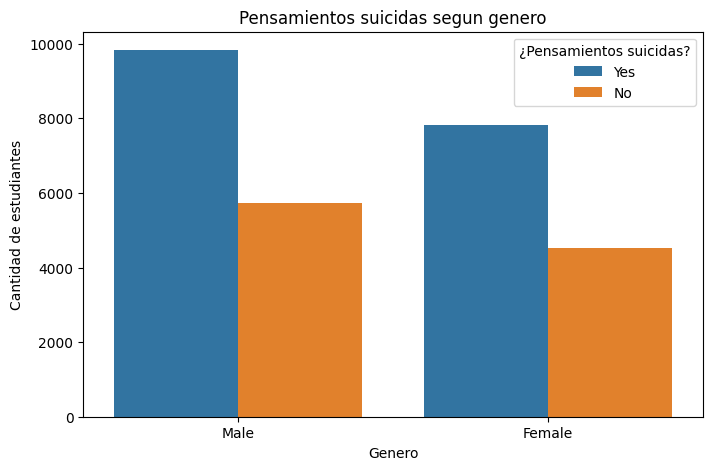

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='Have you ever had suicidal thoughts ?')


plt.title('Pensamientos suicidas segun genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de estudiantes')
plt.legend(title='¿Pensamientos suicidas?')
plt.show()

### Interpretación del gráfico

El gráfico compara la cantidad de estudiantes que han tenido pensamientos suicidas según su género. Se observa que en ambos grupos hay una proporción importante de respuestas afirmativas, sin embargo, **la cantidad total es mayor en estudiantes varones**.

Este resultado sugiere que, al menos en este conjunto de datos, **los hombres reportan con más frecuencia pensamientos suicidas**, lo cual es un dato relevante para diseñar estrategias de prevención que consideren el género como un factor a analizar.

Es importante destacar que estos datos no implican causalidad, pero **sí permiten visibilizar la magnitud del problema y su distribución entre distintos grupos**.


In [ ]:
#¿Cómo se relacionan la presión académica, la presión laboral y el promedio académico?
#Y más importante aún:
#¿El promedio baja cuando el estudiante tiene ambas presiones altas?

#clasificar presion academica
df['Academic Pressure Level'] = df['Academic Pressure'].apply(
    lambda x: 'Alta' if x >= 4 else 'Media' if x == 3 else 'Baja'
)

# Clasificar presión laboral: 0 = No hay, ≥1 = Hay
df['Work Pressure Level'] = df['Work Pressure'].apply(
    lambda x: 'Sí' if x > 0 else 'No'
)

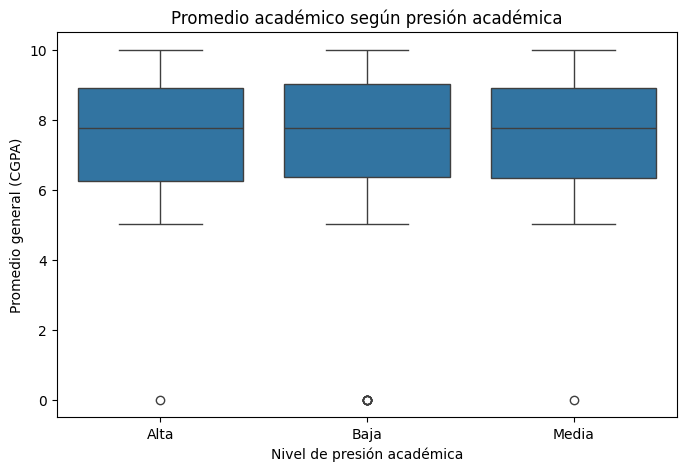

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Academic Pressure Level', y='CGPA')

plt.title('Promedio académico según presión académica')
plt.xlabel('Nivel de presión académica')
plt.ylabel('Promedio general (CGPA)')
plt.show()


### Interpretación del gráfico

El gráfico muestra la distribución del promedio académico (`CGPA`) según el nivel de presión académica percibido por los estudiantes.

A simple vista, se observa que **las medianas del promedio académico son similares entre los distintos niveles de presión académica**, lo que sugiere que la presión no afecta de manera directa o inmediata al rendimiento promedio.

Sin embargo, también se puede ver que **la dispersión en los promedios es mayor en el grupo con presión académica alta**, con más valores extremos (outliers) en la zona baja del rendimiento (menores a 2 o incluso 0).

Esto podría indicar que, aunque muchos estudiantes logran mantener el rendimiento bajo presión, **otros se ven significativamente afectados, bajando su desempeño**.

Por lo tanto, este análisis permite plantear que **la presión académica no necesariamente reduce el promedio en todos los casos**, pero sí **puede aumentar la probabilidad de rendimientos muy bajos en una parte de los estudiantes**.
